<a href="https://colab.research.google.com/github/puskuriashwitha/Task.3-Linear-Regression-/blob/main/Task_3(Linear_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#  Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#  Load the dataset
df = pd.read_csv("StudentsPerformance.csv")
print(df.head())


   Math_Score  Reading_Score  Writing_Score  Placement_Score  Club_Join_Date
0          65             86             67               78            2021
1          64             85             71               80            2019
2          76             77             77               84            2021
3          80             76             75               75            2021
4          63             91             62               90            2019


In [3]:
#  Check actual column names to avoid key errors
print("\nActual Columns:\n", df.columns.tolist())



Actual Columns:
 ['Math_Score', 'Reading_Score', 'Writing_Score', 'Placement_Score', 'Club_Join_Date']


In [4]:
#  Select Features and Target
X = df[['Reading_Score', 'Writing_Score']]
y = df['Math_Score']


In [5]:
#  Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [6]:
# Standardize features (optional but good practice for regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [7]:
# Fit Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)



LinearRegression()

In [8]:
# Predict on Test Set
y_pred = model.predict(X_test_scaled)



In [10]:
#  Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")




Mean Absolute Error (MAE): 6.34
Mean Squared Error (MSE): 50.43
Root Mean Squared Error (RMSE): 7.10
R² Score: -0.19


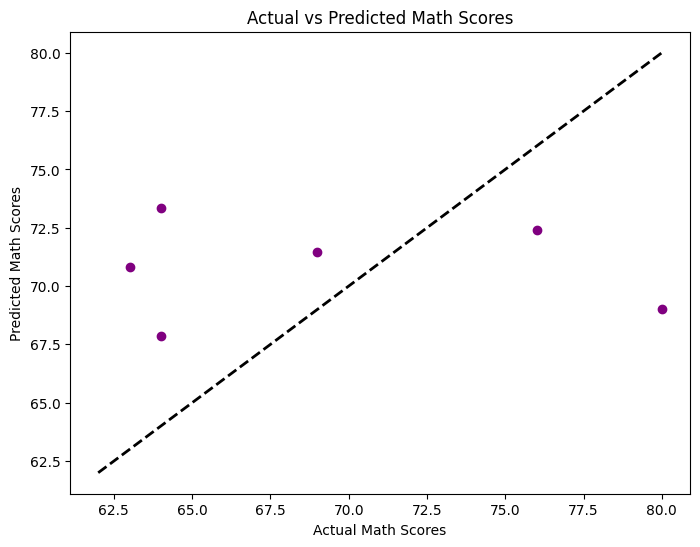

In [11]:
#  Visualize Actual vs Predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Math Scores")
plt.ylabel("Predicted Math Scores")
plt.title("Actual vs Predicted Math Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()


In [12]:
#  Check Coefficients and Intercept
print("\nCoefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [0.43826768 1.95315239]
Intercept: 70.25
